**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
# %%pycodestyle  
# Закомментирован, так как в Jupyter noteebook всегда будет W391,
# независимо от того, есть пустая строка или нет.

# Импорт вспомагательных библиотек
from sklearn.neighbors import KDTree
from scipy.spatial.distance import cdist
from scipy import stats


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin):

    def __init__(self, n_neighbors, algorithm='brute'):

        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):

        self.y_train = np.array(y)

        if self.algorithm == 'brute':
            self.X_train = np.array(X)
        elif self.algorithm == 'kd_tree':
            self.tree = KDTree(np.array(X), leaf_size=30)

    def predict(self, X):

        if self.algorithm == 'brute':
            n_ind = np.argsort(cdist(np.array(X), self.X_train),
                               axis=1)[:, :self.n_neighbors]
        elif self.algorithm == 'kd_tree':
            n_ind = self.tree.query(np.array(X), k=self.n_neighbors,
                                    return_distance=False)

        y_pred = stats.mode(self.y_train[n_ind], axis=1)[0].reshape(-1)

        return y_pred

    def predict_proba(self, X):

        if self.algorithm == 'brute':
            n_ind = np.argsort(cdist(np.array(X), self.X_train),
                               axis=1)[:, :self.n_neighbors]
        elif self.algorithm == 'kd_tree':
            n_ind = self.tree.query(np.array(X), k=self.n_neighbors,
                                    return_distance=False)

        labels = np.unique(self.y_train)
        y_pred = np.zeros((X.shape[0], labels.shape[0]), dtype='float64')

        for i in labels:
            y_pred[:, i] = np.sum(self.y_train[n_ind] == i, axis=1)

        return y_pred / self.n_neighbors

    def score(self, X, y):

        return np.mean(self.predict(X) == np.array(y))


**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.81 ms, sys: 354 µs, total: 2.16 ms
Wall time: 1.97 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 44 µs, sys: 49 µs, total: 93 µs
Wall time: 67.7 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 1.57 ms, sys: 222 µs, total: 1.8 ms
Wall time: 1.65 ms


array([0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 1.06 ms, sys: 705 µs, total: 1.76 ms
Wall time: 958 µs


array([0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.83 ms, sys: 646 µs, total: 2.47 ms
Wall time: 2.17 ms


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 962 µs, sys: 582 µs, total: 1.54 ms
Wall time: 831 µs


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

Для поиска лучшего значения параметра 'n_neighbors' проведем на тренировочном датасете кросс-валидацию с повторениями.
Так как алгоритм метрический, то для лучшей его работы данные будут отмасштабированы до отрезка [0,1].

In [14]:
# Импорт вспомагательных библиотек
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler

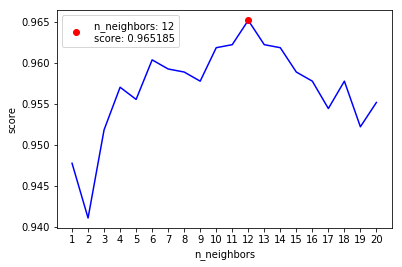

Best n_neighbors: 12
Train_score: 0.9651851851851846
Test_score: 1.0


In [15]:

scr = MinMaxScaler()
n_splits, n_repeats = 5, 20
counts = n_splits * n_repeats
rskf = RepeatedStratifiedKFold(n_splits=n_splits,
                               n_repeats=n_repeats, random_state=0)
neighbors = np.arange(1, 21)
scores = np.array([])

for k in neighbors:
    knn = MyKNeighborsClassifier(n_neighbors=k)
    acc = 0
    for train_index, test_index in rskf.split(X_train, y_train):
        train, test = X_train[train_index], X_train[test_index]
        train = scr.fit_transform(train)
        test = scr.transform(test)
        train_y, test_y = y_train[train_index], y_train[test_index]
        knn.fit(train, train_y)
        acc += knn.score(test, test_y)
    scores = np.append(scores, acc)
scores /= counts

best_iter = np.argmax(np.array(scores))
best_param = neighbors[best_iter]
best_score = scores[best_iter]

plt.plot(neighbors, scores, color='blue')
plt.plot(best_param, best_score, 'ro',
         label='n_neighbors: {}\nscore: {:.6}'.format(best_param, best_score))
plt.xticks(neighbors)
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()

print('Best n_neighbors: {}'.format(best_param))
print('Train_score: {}'.format(best_score))

# Проверка на тестовой выборке
knn = MyKNeighborsClassifier(n_neighbors=best_param)
knn.fit(scr.fit_transform(X_train), y_train)
print('Test_score: {}'.format(knn.score(scr.transform(X_test), y_test)))


**MNIST**

In [16]:
# mnist = fetch_mldata('MNIST original')  # не работает

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', cache=True)
mnist.target = mnist.target.astype('int8')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [18]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [19]:
%time clf.fit(X_train, y_train)

CPU times: user 1min 23s, sys: 639 ms, total: 1min 24s
Wall time: 1min 24s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [20]:
%time my_clf.fit(X_train, y_train)

CPU times: user 242 ms, sys: 303 ms, total: 545 ms
Wall time: 659 ms


In [21]:
%time clf.predict(X_test)

CPU times: user 1min 9s, sys: 236 ms, total: 1min 9s
Wall time: 1min 9s


array([5, 6, 1, 7, 4, 6, 4, 3, 7, 1, 9, 7, 1, 1, 1, 9, 0, 4, 1, 9, 6, 2,
       7, 1, 0, 1, 1, 8, 1, 1, 9, 3, 6, 3, 9, 6, 4, 8, 7, 0, 3, 3, 1, 7,
       7, 2, 9, 0, 7, 0, 5, 1, 4, 0, 7, 3, 5, 6, 2, 5, 0, 4, 3, 2, 1, 5,
       6, 8, 5, 3, 4, 3, 6, 2, 1, 9, 3, 1, 3, 7, 0, 6, 0, 6, 8, 3, 5, 1,
       3, 1, 3, 4, 2, 8, 2, 5, 5, 8, 0, 6, 6, 0, 1, 6, 7, 1, 8, 8, 4, 5,
       8, 6, 1, 9, 3, 9, 2, 9, 6, 1, 5, 9, 6, 5, 6, 6, 3, 6, 7, 1, 4, 1,
       9, 0, 2, 8, 6, 1, 7, 1, 7, 8, 7, 7, 2, 1, 0, 1, 0, 7, 9, 3, 9, 1,
       0, 5, 2, 8, 4, 7, 1, 8, 6, 9, 8, 8, 8, 1, 6, 7, 6, 5, 7, 7, 4, 4,
       0, 4, 6, 9, 2, 3, 6, 6, 3, 8, 2, 6, 8, 9, 9, 7, 5, 7, 4, 1, 8, 3,
       6, 2, 3, 1, 4, 4, 7, 1, 0, 0, 0, 0, 2, 2, 6, 3, 3, 5, 1, 0, 5, 4,
       1, 9, 6, 4, 3, 0, 2, 6, 5, 0, 5, 9, 9, 2, 2, 3, 8, 1, 9, 2, 7, 0,
       6, 5, 8, 6, 7, 4, 7, 8, 5, 2, 7, 4, 1, 4, 7, 4, 9, 0, 6, 7, 0, 4,
       9, 2, 0, 2, 9, 7, 4, 5, 3, 3, 0, 2, 0, 1, 6, 5, 0, 3, 3, 0, 6, 3,
       1, 2, 1, 1, 7, 0, 8, 0, 1, 3, 9, 4, 2, 7, 5,

In [22]:
%time my_clf.predict(X_test)

CPU times: user 52.3 s, sys: 1.81 s, total: 54.1 s
Wall time: 54.6 s


array([5, 6, 1, 7, 4, 6, 4, 3, 7, 1, 9, 7, 1, 1, 1, 9, 0, 4, 1, 9, 6, 2,
       7, 1, 0, 1, 1, 8, 1, 1, 9, 3, 6, 3, 9, 6, 4, 8, 7, 0, 3, 3, 1, 7,
       7, 2, 9, 0, 7, 0, 5, 1, 4, 0, 7, 3, 5, 6, 2, 5, 0, 4, 3, 2, 1, 5,
       6, 8, 5, 3, 4, 3, 6, 2, 1, 9, 3, 1, 3, 7, 0, 6, 0, 6, 8, 3, 5, 1,
       3, 1, 3, 4, 2, 8, 2, 5, 5, 8, 0, 6, 6, 0, 1, 6, 7, 1, 8, 8, 4, 5,
       8, 6, 1, 9, 3, 9, 2, 9, 6, 1, 5, 9, 6, 5, 6, 6, 3, 6, 7, 1, 4, 1,
       9, 0, 2, 8, 6, 1, 7, 1, 7, 8, 7, 7, 2, 1, 0, 1, 0, 7, 9, 3, 9, 1,
       0, 5, 2, 8, 4, 7, 1, 8, 6, 9, 8, 8, 8, 1, 6, 7, 6, 5, 7, 7, 4, 4,
       0, 4, 6, 9, 2, 3, 6, 6, 3, 8, 2, 6, 8, 9, 9, 7, 5, 7, 4, 1, 8, 3,
       6, 2, 3, 1, 4, 4, 7, 1, 0, 0, 0, 0, 2, 2, 6, 3, 3, 5, 1, 0, 5, 4,
       1, 9, 6, 4, 3, 0, 2, 6, 5, 0, 5, 9, 9, 2, 2, 3, 8, 1, 9, 2, 7, 0,
       6, 5, 8, 6, 7, 4, 7, 8, 5, 2, 7, 4, 1, 4, 7, 4, 9, 0, 6, 7, 0, 4,
       9, 2, 0, 2, 9, 7, 4, 5, 3, 3, 0, 2, 0, 1, 6, 5, 0, 3, 3, 0, 6, 3,
       1, 2, 1, 1, 7, 0, 8, 0, 1, 3, 9, 4, 2, 7, 5,

In [23]:
%time clf.predict_proba(X_test)

CPU times: user 1min 20s, sys: 1.4 s, total: 1min 21s
Wall time: 1min 28s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
%time my_clf.predict_proba(X_test)

CPU times: user 56.1 s, sys: 2.36 s, total: 58.5 s
Wall time: 1min


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
clf.score(X_test, y_test)

0.9671428571428572

In [26]:
my_clf.score(X_test, y_test)

0.9671428571428572

Задание 4

In [27]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [29]:
%time clf.fit(X_train, y_train)

CPU times: user 1min 31s, sys: 1.7 s, total: 1min 33s
Wall time: 1min 38s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [30]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1min 29s, sys: 1.9 s, total: 1min 31s
Wall time: 1min 32s


In [31]:
%time clf.predict(X_test)

CPU times: user 1min 15s, sys: 1.41 s, total: 1min 17s
Wall time: 1min 19s


array([0, 9, 5, 7, 6, 3, 3, 6, 3, 1, 3, 9, 8, 4, 6, 3, 0, 0, 9, 9, 7, 9,
       6, 0, 0, 3, 9, 3, 6, 0, 6, 4, 7, 9, 2, 1, 6, 3, 6, 9, 6, 3, 8, 1,
       2, 5, 9, 1, 5, 5, 0, 7, 5, 5, 3, 1, 9, 0, 0, 3, 5, 7, 2, 8, 7, 9,
       1, 1, 0, 4, 6, 7, 6, 0, 9, 1, 8, 9, 9, 0, 8, 3, 6, 7, 8, 2, 5, 3,
       1, 2, 6, 3, 9, 7, 9, 8, 5, 5, 8, 6, 8, 6, 7, 5, 6, 6, 1, 3, 8, 2,
       4, 6, 2, 3, 1, 5, 9, 4, 1, 0, 4, 2, 8, 2, 4, 3, 9, 2, 2, 2, 0, 2,
       9, 9, 4, 9, 1, 3, 5, 2, 4, 7, 9, 1, 8, 4, 3, 0, 0, 7, 4, 7, 3, 2,
       9, 7, 1, 2, 7, 1, 2, 4, 1, 9, 0, 1, 7, 6, 4, 3, 6, 9, 4, 6, 6, 6,
       1, 2, 7, 5, 1, 0, 7, 0, 4, 3, 9, 2, 3, 3, 0, 9, 4, 7, 3, 0, 3, 7,
       8, 1, 2, 2, 4, 6, 5, 3, 1, 9, 1, 3, 5, 0, 7, 3, 8, 2, 1, 0, 8, 9,
       2, 6, 5, 4, 9, 3, 0, 1, 8, 7, 9, 1, 5, 5, 5, 4, 1, 1, 4, 4, 7, 0,
       6, 0, 9, 7, 3, 9, 0, 8, 5, 7, 2, 4, 6, 9, 1, 9, 3, 3, 6, 8, 0, 2,
       9, 8, 8, 3, 7, 0, 2, 5, 4, 0, 6, 1, 3, 2, 5, 2, 1, 9, 0, 9, 3, 5,
       6, 6, 9, 1, 8, 6, 3, 8, 1, 1, 0, 4, 7, 1, 4,

In [32]:
%time my_clf.predict(X_test)

CPU times: user 1min 12s, sys: 1.11 s, total: 1min 13s
Wall time: 1min 15s


array([0, 9, 5, 7, 6, 3, 3, 6, 3, 1, 3, 9, 8, 4, 6, 3, 0, 0, 9, 9, 7, 9,
       6, 0, 0, 3, 9, 3, 6, 0, 6, 4, 7, 9, 2, 1, 6, 3, 6, 9, 6, 3, 8, 1,
       2, 5, 9, 1, 5, 5, 0, 7, 5, 5, 3, 1, 9, 0, 0, 3, 5, 7, 2, 8, 7, 9,
       1, 1, 0, 4, 6, 7, 6, 0, 9, 1, 8, 9, 9, 0, 8, 3, 6, 7, 8, 2, 5, 3,
       1, 2, 6, 3, 9, 7, 9, 8, 5, 5, 8, 6, 8, 6, 7, 5, 6, 6, 1, 3, 8, 2,
       4, 6, 2, 3, 1, 5, 9, 4, 1, 0, 4, 2, 8, 2, 4, 3, 9, 2, 2, 2, 0, 2,
       9, 9, 4, 9, 1, 3, 5, 2, 4, 7, 9, 1, 8, 4, 3, 0, 0, 7, 4, 7, 3, 2,
       9, 7, 1, 2, 7, 1, 2, 4, 1, 9, 0, 1, 7, 6, 4, 3, 6, 9, 4, 6, 6, 6,
       1, 2, 7, 5, 1, 0, 7, 0, 4, 3, 9, 2, 3, 3, 0, 9, 4, 7, 3, 0, 3, 7,
       8, 1, 2, 2, 4, 6, 5, 3, 1, 9, 1, 3, 5, 0, 7, 3, 8, 2, 1, 0, 8, 9,
       2, 6, 5, 4, 9, 3, 0, 1, 8, 7, 9, 1, 5, 5, 5, 4, 1, 1, 4, 4, 7, 0,
       6, 0, 9, 7, 3, 9, 0, 8, 5, 7, 2, 4, 6, 9, 1, 9, 3, 3, 6, 8, 0, 2,
       9, 8, 8, 3, 7, 0, 2, 5, 4, 0, 6, 1, 3, 2, 5, 2, 1, 9, 0, 9, 3, 5,
       6, 6, 9, 1, 8, 6, 3, 8, 1, 1, 0, 4, 7, 1, 4,

In [33]:
%time clf.predict_proba(X_test)

CPU times: user 1min 12s, sys: 1.12 s, total: 1min 14s
Wall time: 1min 15s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 16s, sys: 1.94 s, total: 1min 18s
Wall time: 1min 24s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
clf.score(X_test, y_test)

0.9728571428571429

In [36]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 5

In [37]:
# seaborn -- для различной красивой визуализации.
# matplotlib -- для работы с графиками.
# train_test_split -- для разбиения выборки на трейн и тест.
# Pipeline (from sklearn.pipeline import Pipeline) -- для задания цепочки каких-то процессов.
                                                    # Удобно, когда надо часто прогонять одинаковые процессы.
# StandardScaler (from sklearn.preprocessing import StandardScaler) -- станартизация данных. (a-a.mean())/a.std().
# ClassifierMixin -- Класс Mixin для всех классификаторов в scikit-learn.
# NeighborsBase -- Base класс для nearest neighbors estimators.
# KNeighborsMixin -- Mixin класс для поиска k соседей.
# SupervisedIntegerMixin -- используется для "смешивания" ("mix in") fit методов.